<a href="https://colab.research.google.com/github/faridamousa23/Level-2-Intermediate-/blob/main/Task_3_Clustering_Analysis_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

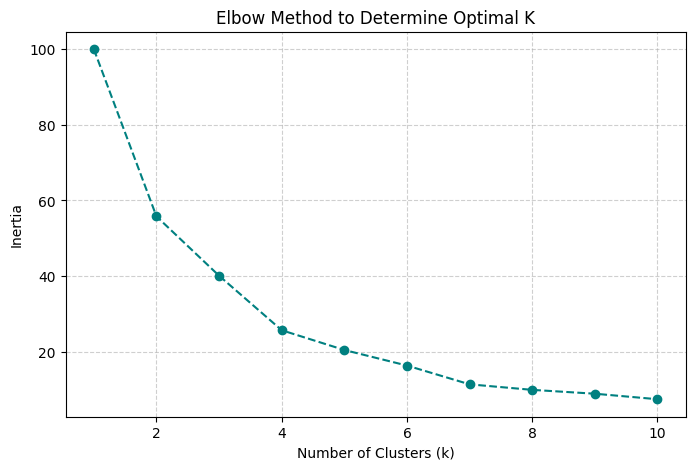

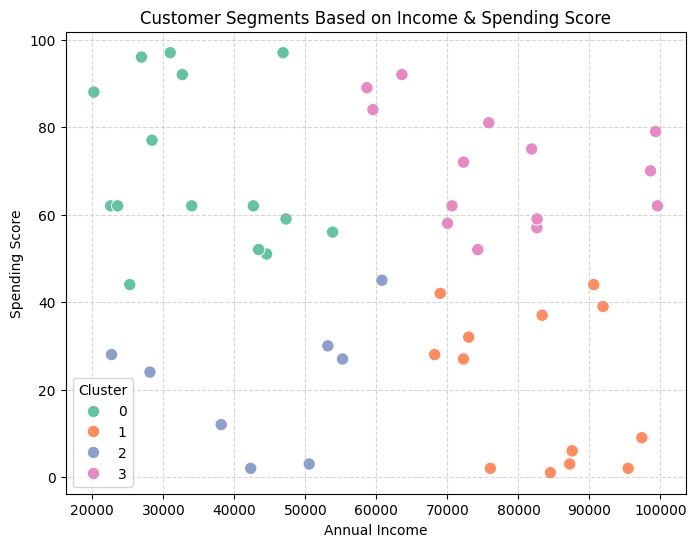


Cluster Centers (in original scale):
   Annual_Income  Spending_Score
0   34871.866667       70.466667
1   82800.230769       20.923077
2   43866.875000       21.375000
3   77807.428571       70.857143


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("sample_customer_data.csv")


X = df[["Annual_Income", "Spending_Score"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='teal')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual_Income",
    y="Spending_Score",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=80
)
plt.title("Customer Segments Based on Income & Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=["Annual_Income", "Spending_Score"])
print("\nCluster Centers (in original scale):")
print(centers_df)
